In [3]:
%pip install fredapi > /dev/null

Note: you may need to restart the kernel to use updated packages.


The system cannot find the path specified.


                                id realtime_start realtime_end  \
series id                                                        
SP500                        SP500     2023-08-28   2023-08-28   
VXVCLS                      VXVCLS     2023-08-28   2023-08-28   
CSUSHPINSA              CSUSHPINSA     2023-08-28   2023-08-28   
CSUSHPISA                CSUSHPISA     2023-08-28   2023-08-28   
VXOCLS                      VXOCLS     2023-08-28   2023-08-28   
...                            ...            ...          ...   
CKSPPPMKA666NRUG  CKSPPPMKA666NRUG     2023-08-28   2023-08-28   
CRDQHKBPABIS          CRDQHKBPABIS     2023-08-28   2023-08-28   
CSHRCPCNA156NRUG  CSHRCPCNA156NRUG     2023-08-28   2023-08-28   
CSHRCPTRA156NRUG  CSHRCPTRA156NRUG     2023-08-28   2023-08-28   
CSHRCPCHA156NRUG  CSHRCPCHA156NRUG     2023-08-28   2023-08-28   

                                                              title  \
series id                                                             

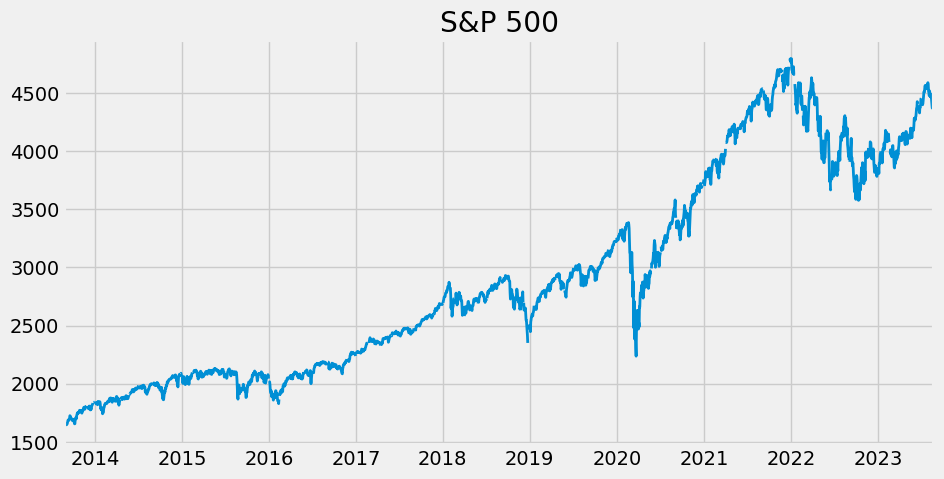

                              id realtime_start realtime_end  \
series id                                                      
UNRATE                    UNRATE     2023-08-28   2023-08-28   
UNRATENSA              UNRATENSA     2023-08-28   2023-08-28   
CCSA                        CCSA     2023-08-28   2023-08-28   
CCNSA                      CCNSA     2023-08-28   2023-08-28   
UNEMPLOY                UNEMPLOY     2023-08-28   2023-08-28   
...                          ...            ...          ...   
LMUNRLTTTRM647S  LMUNRLTTTRM647S     2023-08-28   2023-08-28   
LRUN64TTDEQ156S  LRUN64TTDEQ156S     2023-08-28   2023-08-28   
LMUNRRTTATM156S  LMUNRRTTATM156S     2023-08-28   2023-08-28   
LRUN55TTHUQ156S  LRUN55TTHUQ156S     2023-08-28   2023-08-28   
LMUNRLTTDEM647S  LMUNRLTTDEM647S     2023-08-28   2023-08-28   

                                                             title  \
series id                                                            
UNRATE                     

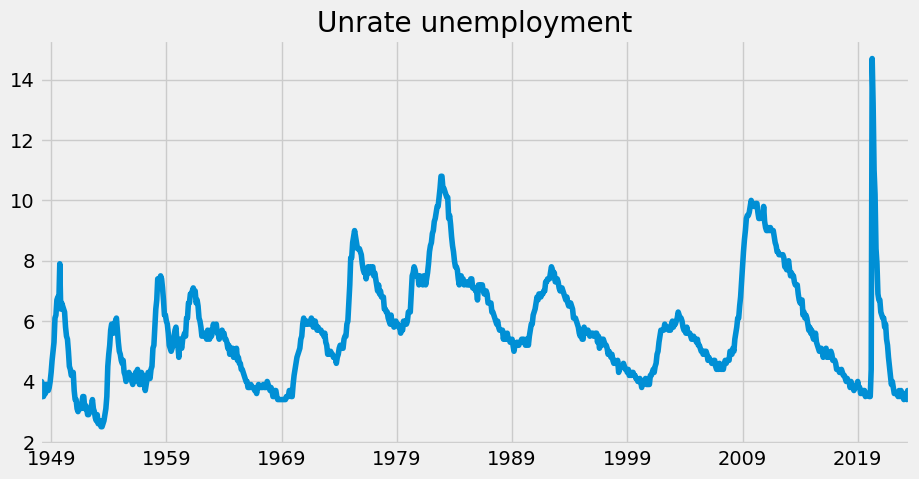

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use("fivethirtyeight")
pd.set_option("display.max_columns", 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

import fredapi as Fred

from fredapi import Fred

fred_key = 'd8d92199a793217cff22cf67d5c8588e'


##Create a fred project

fred = Fred(api_key=fred_key)

##Search Economic Data

search_results = fred.search('S&P')

print(search_results)

sp_search = fred.search('S&P', order_by='popularity')
sp_search.head()

## Pull row data & PLOT

sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)
plt.show()

## Pull and Join Multiple Data Series

unemp_df = fred.search('unemployment')
print(unemp_df)
unemp_df.head()

unrate= fred.get_series('UNRATE')
unrate.plot(figsize=(10, 5), title='Unrate unemployment')


unemp_state = fred.search('unemployment rate state', filter=('frequency', 'monthly'))
unemp_df = unemp_df[
    (unemp_df['seasonal_adjustment'] == "Seasonally Adjusted") &
    (unemp_df['units'] == "Percent") &
    (unemp_df['title'].str.contains('Unemployment Rate'))
]

len(unemp_df.index)

all_results =[]
 
for myid in unemp_df.index:
    results = fred.get_series(myid)
    break
results = results.to_frame(name=myid)
all_results.append(results)












